In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [21]:
dataset=pd.read_csv('../input/calcofi/bottle.csv')
dataset.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [23]:
data=dataset[['T_degC','Salnty']]
data.columns=['Temperature','Salinity']

In [24]:
data

,Temperature,Salinity
0,10.500,33.4400
1,10.460,33.4400
2,10.460,33.4370
3,10.450,33.4200
4,10.450,33.4210
...,...,...
864858,18.744,33.4083
864859,18.744,33.4083
864860,18.692,33.4150
864861,18.161,33.4062


In [25]:
data.dtypes

Temperature    float64
Salinity       float64
dtype: object

In [26]:
data.describe()

,Temperature,Salinity
count,853900.000000,817509.000000
mean,10.799677,33.840350
std,4.243825,0.461843
min,1.440000,28.431000
25%,7.680000,33.488000
50%,10.060000,33.863000
75%,13.880000,34.196900
max,31.140000,37.034000


In [27]:
data.isnull().sum()

Temperature    10963
Salinity       47354
dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Temperature  853900 non-null  float64
 1   Salinity     817509 non-null  float64
dtypes: float64(2)
memory usage: 13.2 MB


In [29]:
data=data[:][:500]

In [30]:
data.fillna(method='ffill', inplace=True)

In [31]:
data.isnull().sum()

Temperature    0
Salinity       0
dtype: int64

In [32]:
from sklearn.model_selection import train_test_split,cross_val_score

In [33]:
X=np.array(data['Salinity']).reshape(-1,1)
y=np.array(data['Temperature']).reshape(-1,1)

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80,random_state=42)

# LINEAR REGRESSION

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred_lr=lr.predict(X_train)
y_pred_lr_test=lr.predict(X_test)

In [38]:
from sklearn.metrics import r2_score

In [39]:
print(r2_score(y_train,y_pred_lr))
print(r2_score(y_test,y_pred_lr_test))

0.8534867439916551
0.8270686543514778


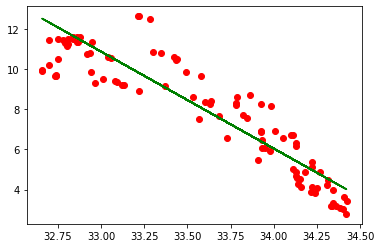

In [40]:
plt.scatter(X_test,y_test,color='r')
plt.plot(X_test,y_pred_lr_test,color='g')
plt.show()

In [41]:
print(lr.intercept_)
print('*****')
print(lr.coef_)

[170.87098939]
*****
[[-4.84772527]]


In [42]:
cross_val_score(lr,X,y,cv=10,scoring='r2').mean()

0.7897720931156469

In [43]:
lr.score(X_test,y_test)

0.8270686543514778

In [44]:
import operator

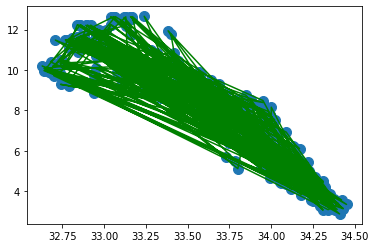

In [45]:
plt.scatter(X_train, y_train, s=100)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,y_pred_lr), key=sort_axis)
X_test, y_pred_lr = zip(*sorted_zip)
plt.plot(X_train, y_train, color='g')
plt.show()

In [46]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as sf

In [47]:
lr_model=sf.OLS(endog=y_train,exog=X_train).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              2630.
Date:                Sat, 23 Jul 2022   Prob (F-statistic):                   1.00e-177
Time:                        06:17:51   Log-Likelihood:                         -1011.3
No. Observations:                 400   AIC:                                      2025.
Df Residuals:                     399   BIC:                                      2029.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2315      0.005     51.286      0.000       0.223       0.240
==============================================================================
Omnibus:                      931.229   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.162
Skew:                          -0.034   Prob(JB):                     2.82e-07
Kurtosis:                       1.656   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# DECISION TREE REGRESSION

In [48]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [49]:
y_pred_dtr=dtr.predict(X_train)

In [50]:
print(r2_score(y_train,y_pred_dtr))

0.9772302632012461


# RANDOM FOREST REGRESSION

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [52]:
y_pred_rf=rf.predict(X_train)

In [53]:
print(r2_score(y_train,y_pred_rf))

0.970469706614476


# POLYNOMIAL REGRESSION

In [54]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
poly=PolynomialFeatures(degree=4)
poly_df=poly.fit_transform(X_train)
lin=LinearRegression()
lin.fit(poly_df,y_train)

LinearRegression()

In [56]:
y_pred_poly=lin.predict(poly_df)

In [57]:
print(r2_score(y_train,y_pred_poly))

0.9239046759284465


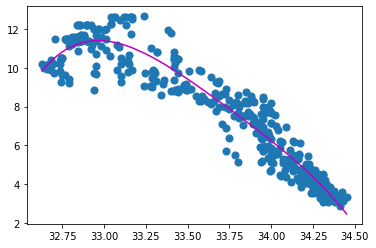

In [58]:
plt.scatter(X_train, y_train, s=50)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,y_pred_poly), key=sort_axis)
X_train,y_pred_poly= zip(*sorted_zip)
plt.plot(X_train,y_pred_poly, color='m')
plt.show()

# DEEP NEURAL NETWORK

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [60]:
dataset=pd.read_csv('../input/calcofi/bottle.csv')
dataset.head(2)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.44,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
data=dataset[['T_degC','Salnty']]
data.columns=['Temperature','Salinity']

In [62]:
data=data[:][:500]
data

,Temperature,Salinity
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421
...,...,...
495,4.90,34.269
496,4.50,34.310
497,4.48,34.311
498,4.21,34.319


In [63]:
data.fillna(method='ffill', inplace=True)

In [64]:
from sklearn.model_selection import train_test_split,cross_val_score

In [65]:
X=np.array(data['Salinity']).reshape(-1,1)
y=np.array(data['Temperature']).reshape(-1,1)

In [66]:
import tensorflow as tf
from tensorflow import keras

In [67]:
tf.__version__

'2.6.4'

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(X)

In [69]:
X = pd.DataFrame(sc_x)
X.head(3)

,0
0,-0.324987
1,-0.324987
2,-0.330331


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 1)
(125, 1)
(375, 1)
(125, 1)


In [71]:
DNN=tf.keras.models.Sequential()
DNN.add(tf.keras.layers.Dense(units=10,activation='relu'))
DNN.add(tf.keras.layers.Dense(units=10,activation='relu'))
DNN.add(tf.keras.layers.Dense(units=1))
DNN.compile(optimizer='adam',loss='mean_squared_error')

In [72]:
DNN.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 2ms/step - loss: 66.2870
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 64.5831
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 62.7938
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 60.8191
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 58.6148
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 56.2127
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 53.6202
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 50.8098
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 47.8650
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 44.7006
Epoch 11/100
12/12 [==============================] - 0s 2ms/step - loss: 41.5204
Epoch 12/100
12/12 [==============================] - 0s 2ms/step - loss: 38.2441
Epoch 13/100
12/12 [=====

In [73]:
y_pred_DNN=DNN.predict(X_test)
print(y_test)
print('*'*10)
print(y_pred_DNN)

[[ 4.89]
 [ 3.93]
 [ 5.95]
 [ 9.62]
 [ 9.82]
 [ 8.19]
 [ 3.42]
 [ 9.75]
 [12.  ]
 [ 3.43]
 [11.13]
 [ 6.54]
 [ 4.07]
 [ 9.87]
 [ 4.72]
 [12.64]
 [ 3.76]
 [11.23]
 [ 6.54]
 [ 4.83]
 [ 9.49]
 [11.5 ]
 [11.5 ]
 [ 6.11]
 [ 9.92]
 [ 3.18]
 [ 9.06]
 [ 3.57]
 [ 4.54]
 [ 8.16]
 [ 3.28]
 [ 4.53]
 [ 8.06]
 [10.53]
 [11.38]
 [10.34]
 [ 3.32]
 [10.45]
 [ 4.14]
 [ 7.53]
 [ 9.17]
 [ 4.52]
 [ 3.76]
 [ 3.37]
 [ 7.78]
 [ 8.25]
 [ 8.71]
 [ 9.1 ]
 [ 3.18]
 [ 9.27]
 [ 7.65]
 [ 3.11]
 [10.45]
 [ 8.26]
 [ 8.77]
 [10.05]
 [ 6.16]
 [ 6.99]
 [ 8.45]
 [11.35]
 [11.39]
 [ 4.31]
 [11.2 ]
 [ 5.28]
 [10.97]
 [11.5 ]
 [ 8.62]
 [ 4.24]
 [11.58]
 [ 8.29]
 [10.63]
 [10.56]
 [ 4.36]
 [10.1 ]
 [ 8.18]
 [ 4.61]
 [ 4.9 ]
 [ 5.71]
 [11.99]
 [ 8.28]
 [ 8.88]
 [ 4.31]
 [12.64]
 [ 9.39]
 [ 7.5 ]
 [12.21]
 [ 9.77]
 [11.58]
 [ 6.7 ]
 [10.61]
 [10.6 ]
 [ 9.27]
 [ 9.08]
 [10.45]
 [ 7.53]
 [ 9.67]
 [12.64]
 [10.4 ]
 [12.23]
 [ 7.08]
 [ 5.49]
 [ 3.04]
 [10.8 ]
 [ 3.38]
 [11.47]
 [ 6.93]
 [11.47]
 [12.  ]
 [ 4.71]
 [ 9.32]
 [11.38]
 

In [74]:
from sklearn.metrics import r2_score

In [75]:
print(r2_score(y_test,y_pred_DNN))

0.8172373922001798
